# Библиотеки

In [1]:
from zlib import crc32

import numpy as np
import pandas as pd
import scipy.stats as st
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# Код генерации выборки

In [2]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    tip = rs.randint(low=0, high=3)
    if tip == 1:
        w = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
    if tip == 2:
        w= [1, 1, 1, 1, 1, 0, 0, 0, 0, 0][::-1]
    if tip == 0:
        w = [0]*10
    x = rs.randn(1000, 10)
    y = (np.dot(x, w)+rs.randn(1000)*1.0)
    y[100:] += 1 * rs.randn(900) * rs.uniform(size = 900)
    y = 1.0*(y >= 0)
    return np.hstack([y.reshape(1000, 1), x])

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [3]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task

Enter your mail: egorov.sa@phystech.edu


{'mail': 'egorov.sa@phystech.edu',
 'id': 1581189463,
 'data': array([[ 1.        ,  1.00754991,  2.59101298, ..., -0.4618316 ,
         -0.36714371, -0.79388664],
        [ 0.        ,  0.4693312 , -1.23106117, ...,  0.51028668,
          0.36842255,  0.85743457],
        [ 0.        , -0.34669133, -1.3763102 , ..., -0.76784395,
          1.40036574,  0.91283728],
        ...,
        [ 0.        ,  1.20616381, -1.85096773, ...,  0.07183426,
         -2.08852319, -0.91691094],
        [ 0.        , -1.59495286,  0.53278689, ...,  1.41377555,
          0.37813413,  2.01005682],
        [ 1.        ,  0.72574386,  1.5369252 , ...,  0.45766579,
          0.40047438, -0.72774661]])}

# Работа с выборкой

In [4]:
data = pd.DataFrame(task['data'])
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.515000,0.041781,0.034529,0.031731,-0.040656,0.021736,0.011568,0.069776,0.052501,0.101195,0.019088
std,0.500025,0.990926,1.014311,1.005185,1.011249,1.008219,1.023700,0.987919,0.953550,1.008092,0.995165
min,0.000000,-3.311592,-3.583994,-2.972529,-3.524466,-3.179774,-3.221397,-3.352865,-3.135026,-3.137188,-2.909790
25%,0.000000,-0.619967,-0.644281,-0.656234,-0.730749,-0.636137,-0.635739,-0.606152,-0.565722,-0.557454,-0.686590
50%,1.000000,0.082112,0.004654,0.047744,-0.012032,0.043318,0.029286,0.069703,0.101007,0.209402,0.032202
75%,1.000000,0.727645,0.723157,0.711203,0.663826,0.674414,0.678648,0.720354,0.668214,0.761216,0.684967
max,1.000000,2.751709,3.035866,2.861487,3.464412,3.603536,3.334195,3.376264,2.717052,3.489773,3.174828


In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.007550,2.591013,1.980620,0.185250,-1.859187,0.637818,-1.005610,-0.461832,-0.367144,-0.793887
1,0.0,0.469331,-1.231061,0.229116,-2.453508,-0.827903,-0.293239,-1.145627,0.510287,0.368423,0.857435
2,0.0,-0.346691,-1.376310,0.150634,-0.031550,-0.161607,1.183196,-0.507081,-0.767844,1.400366,0.912837
3,1.0,1.315461,0.336273,1.064693,-0.106900,0.618077,2.446219,-0.934256,-1.448756,0.930821,-0.989214
4,1.0,0.734159,-0.027672,0.585530,0.048624,-0.683525,0.936597,-0.717582,0.235788,-0.719641,0.906227


In [6]:
column_names = list(map(lambda num: f"X{num - 1}", data.columns))
column_names[0] = 'Y'
column_names
data.columns = column_names
data.describe()

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.515000,0.041781,0.034529,0.031731,-0.040656,0.021736,0.011568,0.069776,0.052501,0.101195,0.019088
std,0.500025,0.990926,1.014311,1.005185,1.011249,1.008219,1.023700,0.987919,0.953550,1.008092,0.995165
min,0.000000,-3.311592,-3.583994,-2.972529,-3.524466,-3.179774,-3.221397,-3.352865,-3.135026,-3.137188,-2.909790
25%,0.000000,-0.619967,-0.644281,-0.656234,-0.730749,-0.636137,-0.635739,-0.606152,-0.565722,-0.557454,-0.686590
50%,1.000000,0.082112,0.004654,0.047744,-0.012032,0.043318,0.029286,0.069703,0.101007,0.209402,0.032202
75%,1.000000,0.727645,0.723157,0.711203,0.663826,0.674414,0.678648,0.720354,0.668214,0.761216,0.684967
max,1.000000,2.751709,3.035866,2.861487,3.464412,3.603536,3.334195,3.376264,2.717052,3.489773,3.174828


In [7]:
X = data.drop('Y', axis=1)
y = data['Y']
print(X.shape, y.shape)

(1000, 10) (1000,)


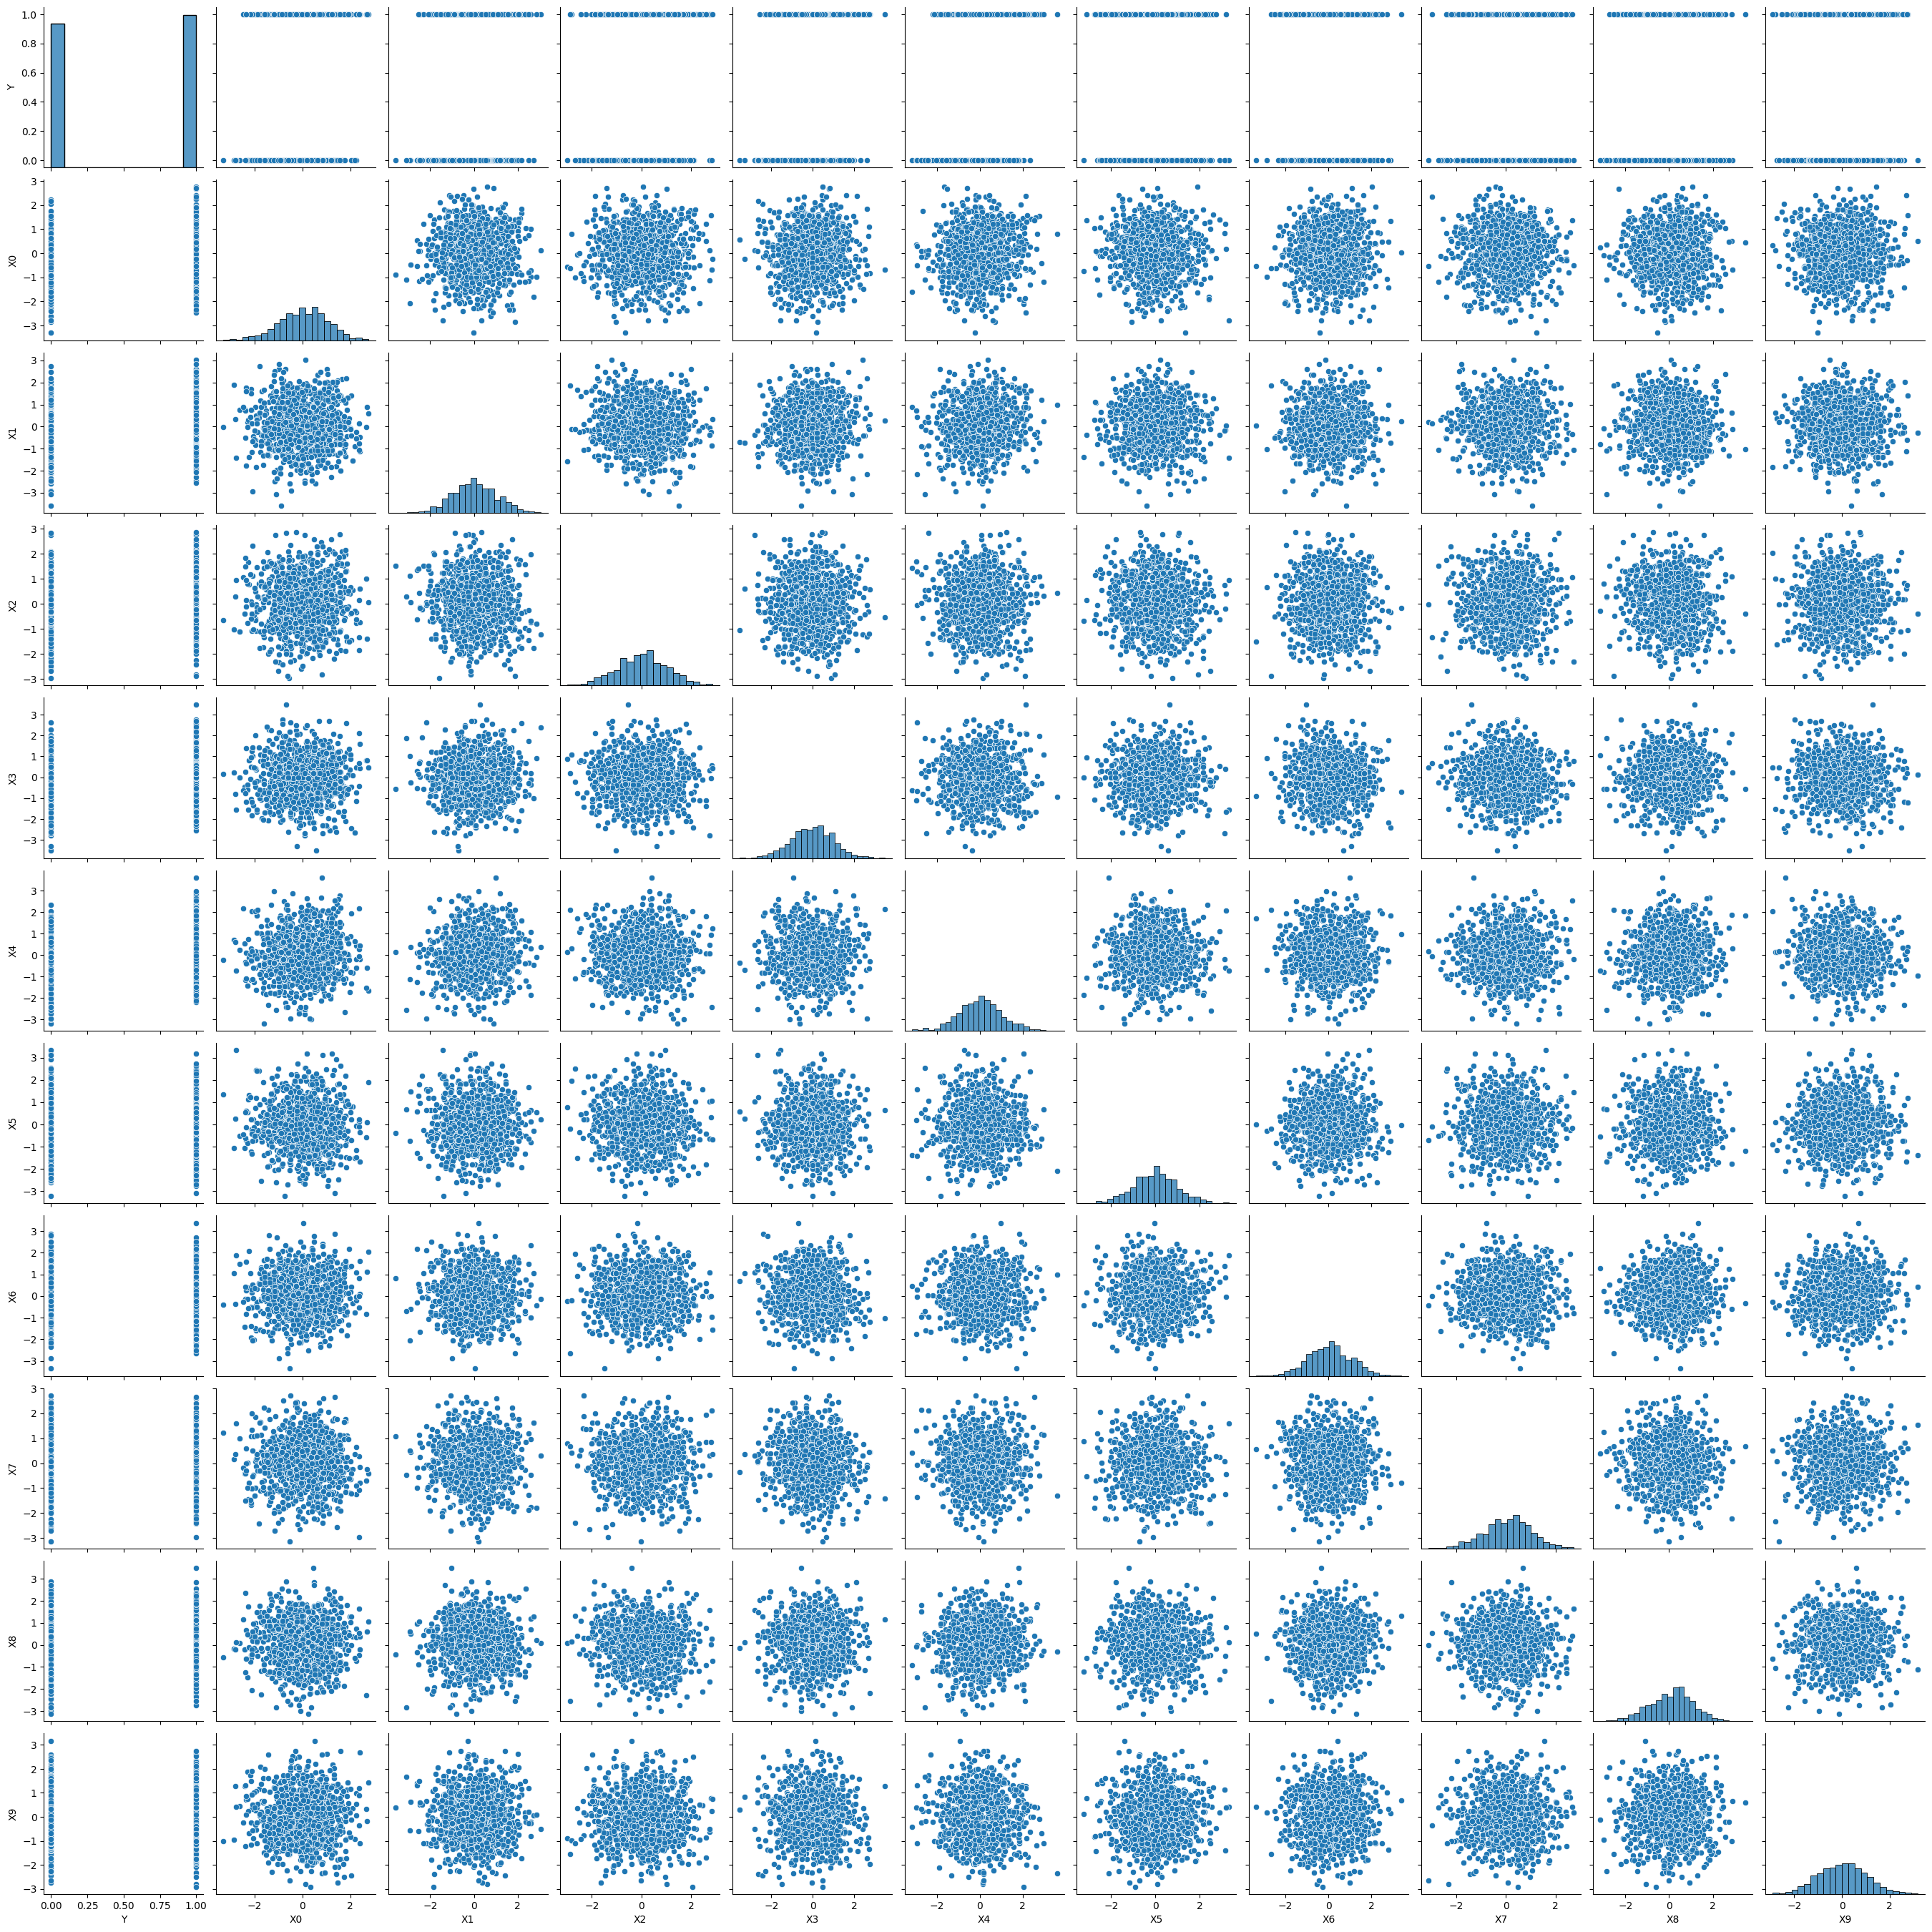

In [8]:
sns.pairplot(data)

## Вопрос 1
Постройте модель логистической регрессии $Y$ от $X$ и свободного коэффициента. Каково отношение шансов $Y=1$ к событию $f(X) = 1$, где $f(X)$ - отклик?

In [9]:
logit_model = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.343298
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                  0.5044
Time:                        15:01:59   Log-Likelihood:                -343.30
converged:                       True   LL-Null:                       -692.70
Covariance Type:            nonrobust   LLR p-value:                1.137e-143
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0340      0.097      0.350      0.726      -0.156       0.224
X0             1.3935      0.127     10.977      0.000       1.145       1.642
X1             1.5296      0.129     11.869      0.000       1.277       1.782
X2             1.4574      0.129     11.321      0.000       1.205       1.710
X3             1.4540      0.128     11.321      0.000       1.202       1.706
X4             1.4629      0.129     11.305      0.000       1.209       1.717
X5            -0.0170      0.097     -0.176      0.860      -0.206       0.172
X6            -0.0683      0.096     -0.715      0.475      -0.256       0.119
X7             0.0775      0.102      0.761      0.447      -0.122       0.277
X8             0.0738      0.097      0.760      0.447      -0.116       0.264
X9             0.1057      0.095      1.114      0.265      -0.080       0.292
==============================================================================
"""

In [10]:
y.sum()

515.0

In [11]:
import numpy as np
np.exp(logit_model.params)

const    1.034601
X0       4.029067
X1       4.616301
X2       4.294829
X3       4.280119
X4       4.318499
X5       0.983149
X6       0.933971
X7       1.080567
X8       1.076564
X9       1.111464
dtype: float64

Андрей сказал, что тут от нас требуют штуку под названием *Odds ratio*

In [12]:
p_endog = y.sum()
p_endog_normed = p_endog / len(y)
f = logit_model.predict(sm.add_constant(X))
response = list(map(round, f))
p_resp = len(list(filter(lambda x: x == 1, response)))
p_resp_normed = p_resp / len(response)
OR = (p_endog_normed / (1 - p_endog_normed)) * ((1 - p_resp_normed) / p_resp_normed)

In [13]:
np.round(OR, decimals=2)

0.98

## Вопрос 2
Какова точность (Accuracy) классификации модели при пороге вероятности для классификации $p_0 = 0.5$?

In [14]:
np.round(accuracy_score(y, response), decimals=2)

0.84

## Вопрос 3
Постройте модель логистической регрессии $Y$ от $X$ и свободного коэффициента для первых $200$ элементов выборки. Имеет ли смысл данная модель согласно критерию Вальда? (p-value$=0.05$)

In [15]:
X = X[0:200]
y = y[0:200]

In [16]:
new_model = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
new_model.summary()

Optimization terminated successfully.
         Current function value: 0.355929
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      189
Method:                           MLE   Df Model:                           10
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                  0.4864
Time:                        15:02:00   Log-Likelihood:                -71.186
converged:                       True   LL-Null:                       -138.59
Covariance Type:            nonrobust   LLR p-value:                 4.872e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0234      0.225     -0.104      0.917      -0.465       0.418
X0             1.0653      0.255      4.178      0.000       0.565       1.565
X1             1.8429      0.322      5.717      0.000       1.211       2.475
X2             1.2682      0.279      4.544      0.000       0.721       1.815
X3             1.1300      0.277      4.077      0.000       0.587       1.673
X4             1.2414      0.292      4.253      0.000       0.669       1.813
X5             0.5033      0.243      2.070      0.038       0.027       0.980
X6            -0.0581      0.204     -0.286      0.775      -0.457       0.341
X7             0.0476      0.231      0.206      0.837      -0.406       0.501
X8            -0.1551      0.208     -0.747      0.455      -0.562       0.252
X9             0.4305      0.227      1.897      0.058      -0.014       0.875
==============================================================================
"""

In [17]:
from functools import reduce

string = reduce(lambda x, a: a + x, reversed(' = '.join(map(lambda x: f'X{x}', range(10)))))
string = 'const = ' + string

In [18]:
new_model.wald_test(string).summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


'<Wald test (chi2): statistic=[[40.5926231]], p-value=1.3320227525860497e-05, df_denom=10>'

Модель имеет смысл, т.к. нулевая гипотеза о том, что все переменные = 0 имеет pvalue меньше 0.05

## Вопрос 4
Можно ли обнулить первые четыре переменные согласно критерию Вальда? (p-value$=0.05$)

In [19]:
string = reduce(lambda x, a: a + x, reversed(' = '.join(map(lambda x: f'X{x}', range(4)))))

In [20]:
new_model.wald_test(string).summary()

'<Wald test (chi2): statistic=[[8.19719152]], p-value=0.042107387388201044, df_denom=3>'

Можно обнулить, ибо нулевая гипотеза, что первые 4 переменные равны нулю, имеет `p-value` меньше $0.05$